# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
campaigns_df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [60]:
campaigns_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [61]:
# check the data types of each column
campaigns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is no missing values.

The following columns need to be encoded :  
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y

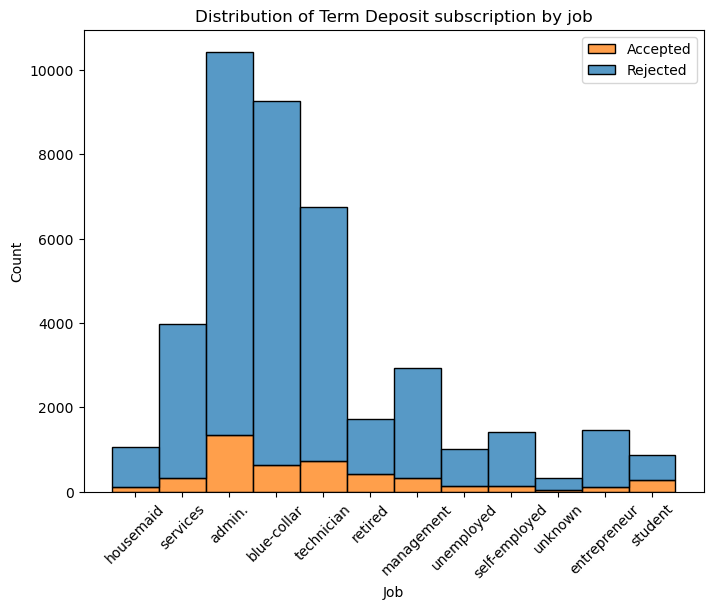

In [98]:
# Build the histogram plot with Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=campaigns_df, x='job', hue='y', multiple='stack')

# Update titles and labels
plt.title('Distribution of Term Deposit subscription by job')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.ylabel('Count')

# Change the legend labels
plt.legend(title='', labels=['Accepted', 'Rejected'])

# Display the plot
plt.show()

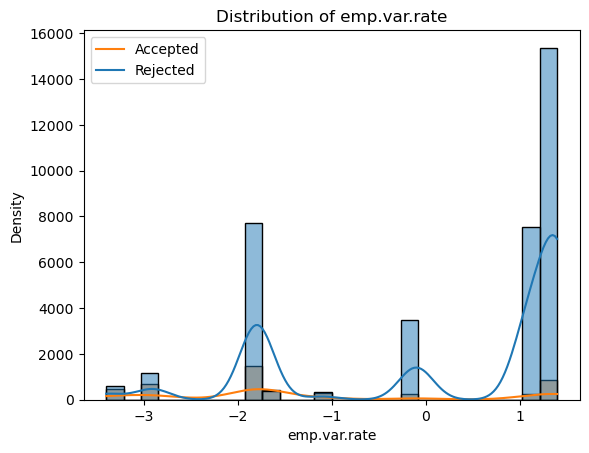

In [107]:
sns.histplot(campaigns_df, x="emp.var.rate", hue="y", kde="true")

# Add title and labels
plt.title('Distribution of emp.var.rate')
plt.xlabel('emp.var.rate')
plt.ylabel('Density')

# Change the legend labels
plt.legend(title='', labels=['Accepted', 'Rejected'])

# Show plot
plt.show()

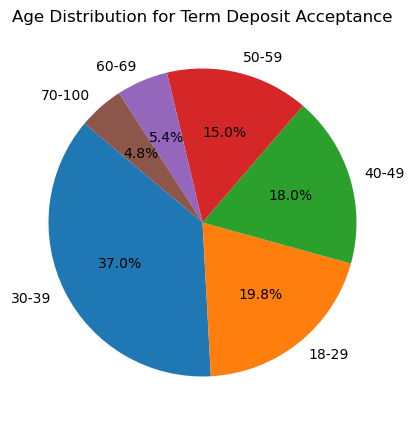

In [115]:
accepted_campaigns = campaigns_df[campaigns_df['y']=='yes']

# Define age categories
age_bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-100']

# Bin the ages
age_categories = pd.cut(accepted_campaigns['age'], bins=age_bins, labels=labels, right=False)

# Calculate the proportion of individuals in each age category
age_counts = age_categories.value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution for Term Deposit Acceptance') 

# Show plot
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective is to determine if it's possible to predict if the customer will subscribe a term deposit (variable y).
According to these predictions, the bank could improve his marketing campaign to get more subscription amongst the customer, or could target customers who are the most susceptible to subscribe to their products.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [62]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

In [63]:
# select only the first 7 columns of the dataset
X = campaigns_df.iloc[:, :7]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the categorical columns
X['job'] = label_encoder.fit_transform(X['job'])
X['marital'] = label_encoder.fit_transform(X['marital'])
X['education'] = label_encoder.fit_transform(X['education'])
X['default'] = label_encoder.fit_transform(X['default'])
X['housing'] = label_encoder.fit_transform(X['housing'])
X['loan'] = label_encoder.fit_transform(X['loan'])

# Scaling of the inputs so they are at the same level 
X_scaled = StandardScaler().fit_transform(X)

print(X_scaled.shape)

# encode the variable y output
y = label_encoder.fit_transform(campaigns_df['y'])

print(len(y))

(41188, 7)
41188


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [65]:
import numpy as np

# we calculate the score of the baseline for which 
# we would give output as same as the majority in the dataset
# here it's given by round(y_train.mean(),0)
baseline_train = np.ones(shape = y_train.shape)*round(y_train.mean(),0)
baseline_test = np.ones(shape = y_test.shape)*round(y_test.mean(),0)
score_baseline_train = accuracy_score(baseline_train, y_train)
score_baseline_test = accuracy_score(baseline_test, y_test)

print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {score_baseline_train}')
print(f'Baseline for testing data: {score_baseline_test}')



(30891,) (10297,)
Baseline for training data: 0.887119225664433
Baseline for testing data: 0.8880256385354958


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [66]:
# Logistic Regression with GridSearchCV
log_reg = LogisticRegression(max_iter=1)
log_reg.fit(X_train, y_train)

/Users/baha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

### Problem 9: Score the Model

What is the accuracy of your model?

In [67]:

score_log_reg_train = accuracy_score(log_reg.predict(X_train), y_train)
score_log_reg_test = accuracy_score(log_reg.predict(X_test), y_test)
print(f'Logistic Regression score for training data: {score_log_reg_train}')
print(f'Logistic Regression score for testing data: {score_log_reg_test}')

Logistic Regression score for training data: 0.887119225664433
Logistic Regression score for testing data: 0.8880256385354958


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [68]:
import time

# Initialize an empty list to store the results
results = []

# Logistic Regression
start_time = time.time()
log_reg = LogisticRegression().fit(X_train, y_train)
end_time = time.time()
log_reg_score_train = accuracy_score(log_reg.predict(X_train), y_train)
log_reg_score_test = accuracy_score(log_reg.predict(X_test), y_test)
results.append({'Model': 'Logistic Regression', 'Score Test': log_reg_score_test,
                'Score Train': log_reg_score_train, 'Time': end_time - start_time})

# Decision Tree 
start_time = time.time()
decisionTree = DecisionTreeClassifier().fit(X_train, y_train)
end_time = time.time()
decision_tree_score_train = accuracy_score(decisionTree.predict(X_train), y_train)
decision_tree_score_test = accuracy_score(decisionTree.predict(X_test), y_test)
results.append({'Model': 'Decision Tree', 'Score Test': decision_tree_score_test,
                'Score Train': decision_tree_score_train, 'Time': end_time - start_time})

# KNN 
start_time = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
end_time = time.time()
knn_score_train = accuracy_score(knn.predict(X_train), y_train)
knn_score_test = accuracy_score(knn.predict(X_test), y_test)
results.append({'Model': 'KNN', 'Score Test': knn_score_test,
                'Score Train': knn_score_train, 'Time': end_time - start_time})

# SVM 
start_time = time.time()
svc = SVC().fit(X_train, y_train)
end_time = time.time()
svm_score_train = accuracy_score(svc.predict(X_train), y_train)
svm_score_test = accuracy_score(svc.predict(X_test), y_test)
results.append({'Model': 'SVM', 'Score Test': svm_score_test,
                'Score Train': svm_score_train, 'Time': end_time - start_time})

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)

results_df

,Model,Score Test,Score Train,Time
0,Logistic Regression,0.888026,0.887119,0.625079
1,Decision Tree,0.861804,0.916966,0.321190
2,KNN,0.875983,0.888576,0.012899
3,SVM,0.888026,0.887216,20.260249


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

To improve the model, we are using more features about social and economic context. (last 5 features).

I'm not sure about the gender feature because there is no such feature in the dataset.

We are also including a grid search for each model adding some hyperparameters, then the last dataFrame represents the results with time, score accuracy and precision for each model.

In [69]:
# Select the first 7 and last 5 columns
X = campaigns_df.iloc[:, :7].join(campaigns_df.iloc[:, -6:]).drop(columns=['y'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the categorical columns
X['job'] = label_encoder.fit_transform(X['job'])
X['marital'] = label_encoder.fit_transform(X['marital'])
X['education'] = label_encoder.fit_transform(X['education'])
X['default'] = label_encoder.fit_transform(X['default'])
X['housing'] = label_encoder.fit_transform(X['housing'])
X['loan'] = label_encoder.fit_transform(X['loan'])

# Scaling of the inputs so they are at the same level 
X_scaled = StandardScaler().fit_transform(X)

print(X_scaled.shape)

# encode the variable y output
y = label_encoder.fit_transform(campaigns_df['y'])

print(len(y))

(41188, 12)
41188


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [71]:
# Logistic Regression with GridSearchCV
log_reg = LogisticRegression()
param_grid_log_reg = {'max_iter': [1, 5, 10, 20, 50]}
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
log_reg_best_params = grid_search_log_reg.best_params_
print("Logistic Regression Best Parameters:", log_reg_best_params)
log_reg_best_model = grid_search_log_reg.best_estimator_

/Users/baha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/baha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression Best Parameters: {'max_iter': 10}


/Users/baha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:

print("Logistic Regression Best Parameters:", log_reg_best_params)

Logistic Regression Best Parameters: {'max_iter': 10}


In [73]:
# Decision Tree with GridSearchCV
param_grid_decision_tree = {'max_depth': [3, 5, 7, 10, 15]}
grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(X_train, y_train)
decision_tree_best_params = grid_search_decision_tree.best_params_
print("Decision Tree Best Parameters:", decision_tree_best_params)
decision_tree_best_model = grid_search_decision_tree.best_estimator_

Decision Tree Best Parameters: {'max_depth': 3}


In [118]:
# KNN with GridSearchCV
param_grid_knn = {'n_neighbors': [1, 5, 10, 15, 20, 25]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
knn_best_params = grid_search_knn.best_params_
print("KNN Best Parameters:", knn_best_params)
knn_best_model = grid_search_knn.best_estimator_

KNN Best Parameters: {'n_neighbors': 20}


In [75]:
# SVM with GridSearchCV
svm = SVC()
param_grid_svm = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
svm_best_params = grid_search_svm.best_params_
print("SVM Best Parameters:", svm_best_params)
svm_best_model = grid_search_svm.best_estimator_

SVM Best Parameters: {'kernel': 'rbf'}


In [119]:
# Initialize an empty list to store the results
results_gs = []

# Logistic Regression
start_time = time.time()
log_reg_best_model.fit(X_train, y_train)
end_time = time.time()
log_reg_score_train = accuracy_score(log_reg_best_model.predict(X_train), y_train)
log_reg_score_test = accuracy_score(log_reg_best_model.predict(X_test), y_test)
log_reg_score_train_prec = precision_score(y_train, log_reg_best_model.predict(X_train))
log_reg_score_test_prec = precision_score(y_test, log_reg_best_model.predict(X_test))
results_gs.append({'Model': 'Logistic Regression', 'Accu. Score Test': log_reg_score_test,
                'Accu. Score Train': log_reg_score_train, 'Prec. Score Test': log_reg_score_test_prec,
                'Prec. Score Train': log_reg_score_train_prec,'Time': end_time - start_time})

# Decision Tree 
start_time = time.time()
decision_tree_best_model.fit(X_train, y_train)
end_time = time.time()
decision_tree_score_train = accuracy_score(decision_tree_best_model.predict(X_train), y_train)
decision_tree_score_test = accuracy_score(decision_tree_best_model.predict(X_test), y_test)
decision_tree_score_train_prec = precision_score(y_train, decision_tree_best_model.predict(X_train))
decision_tree_score_test_prec = precision_score(y_test, decision_tree_best_model.predict(X_test))
results_gs.append({'Model': 'Decision Tree', 'Accu. Score Test': decision_tree_score_test,
                'Accu. Score Train': decision_tree_score_train, 'Prec. Score Test': decision_tree_score_test_prec,
                'Prec. Score Train': decision_tree_score_train_prec,'Time': end_time - start_time})

# KNN 
start_time = time.time()
knn_best_model.fit(X_train, y_train)
end_time = time.time()
knn_score_train = accuracy_score(knn_best_model.predict(X_train), y_train)
knn_score_test = accuracy_score(knn_best_model.predict(X_test), y_test)
knn_score_train_prec = precision_score(y_train, knn_best_model.predict(X_train))
knn_score_test_prec = precision_score(y_test, knn_best_model.predict(X_test))
results_gs.append({'Model': 'KNN', 'Accu. Score Test': knn_score_test,
                'Accu. Score Train': knn_score_train, 'Prec. Score Test': knn_score_test_prec,
                'Prec. Score Train': knn_score_train_prec,'Time': end_time - start_time})

# SVM 
start_time = time.time()
svm_best_model.fit(X_train, y_train)
end_time = time.time()
svm_score_train = accuracy_score(svm_best_model.predict(X_train), y_train)
svm_score_test = accuracy_score(svm_best_model.predict(X_test), y_test)
svm_score_train_prec = precision_score(y_train, svm_best_model.predict(X_train))
svm_score_test_prec = precision_score(y_test, svm_best_model.predict(X_test))
results_gs.append({'Model': 'SVM', 'Accu. Score Test': svm_score_test,
                'Accu. Score Train': svm_score_train, 'Prec. Score Test': svm_score_test_prec,
                'Prec. Score Train': svm_score_train_prec,'Time': end_time - start_time})

# Convert the list of results into a DataFrame
results_gs_df = pd.DataFrame(results_gs)

results_gs_df

/Users/baha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accu. Score Test,Accu. Score Train,Prec. Score Test,Prec. Score Train,Time
0,Logistic Regression,0.888317,0.887508,0.508108,0.509091,0.122820
1,Decision Tree,0.892396,0.890389,0.539405,0.528419,0.141636
2,KNN,0.891230,0.895147,0.555932,0.622772,0.177532
3,SVM,0.891133,0.893335,0.555172,0.601480,17.472838


In [117]:
# Get the coefficients of the model
coefficients = log_reg_best_model.coef_[0]

# Get the absolute values of the coefficients for importance ranking
absolute_coefficients = np.abs(coefficients)

# Combine feature names with coefficients for better interpretation
feature_coefficients = list(zip(list(X.columns), absolute_coefficients))

# Sort features by their importance (absolute coefficient value)
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

# Display the top 10 most important features
print(f"Top 10 most important features:")
for feature, coefficient in feature_coefficients[:10]:
    print(f"{feature}: {coefficient}")

Top 10 most important features:
emp.var.rate: 0.7909169705507904
cons.price.idx: 0.44326190336132343
nr.employed: 0.3673888001837127
default: 0.17789010927277887
cons.conf.idx: 0.16968334863111037
education: 0.09598137609449219
euribor3m: 0.078911513323043
age: 0.07515240911604743
marital: 0.05063465754229564
loan: 0.010377559169081455


Text(0.5, 1.0, 'Decision Tree Plot')

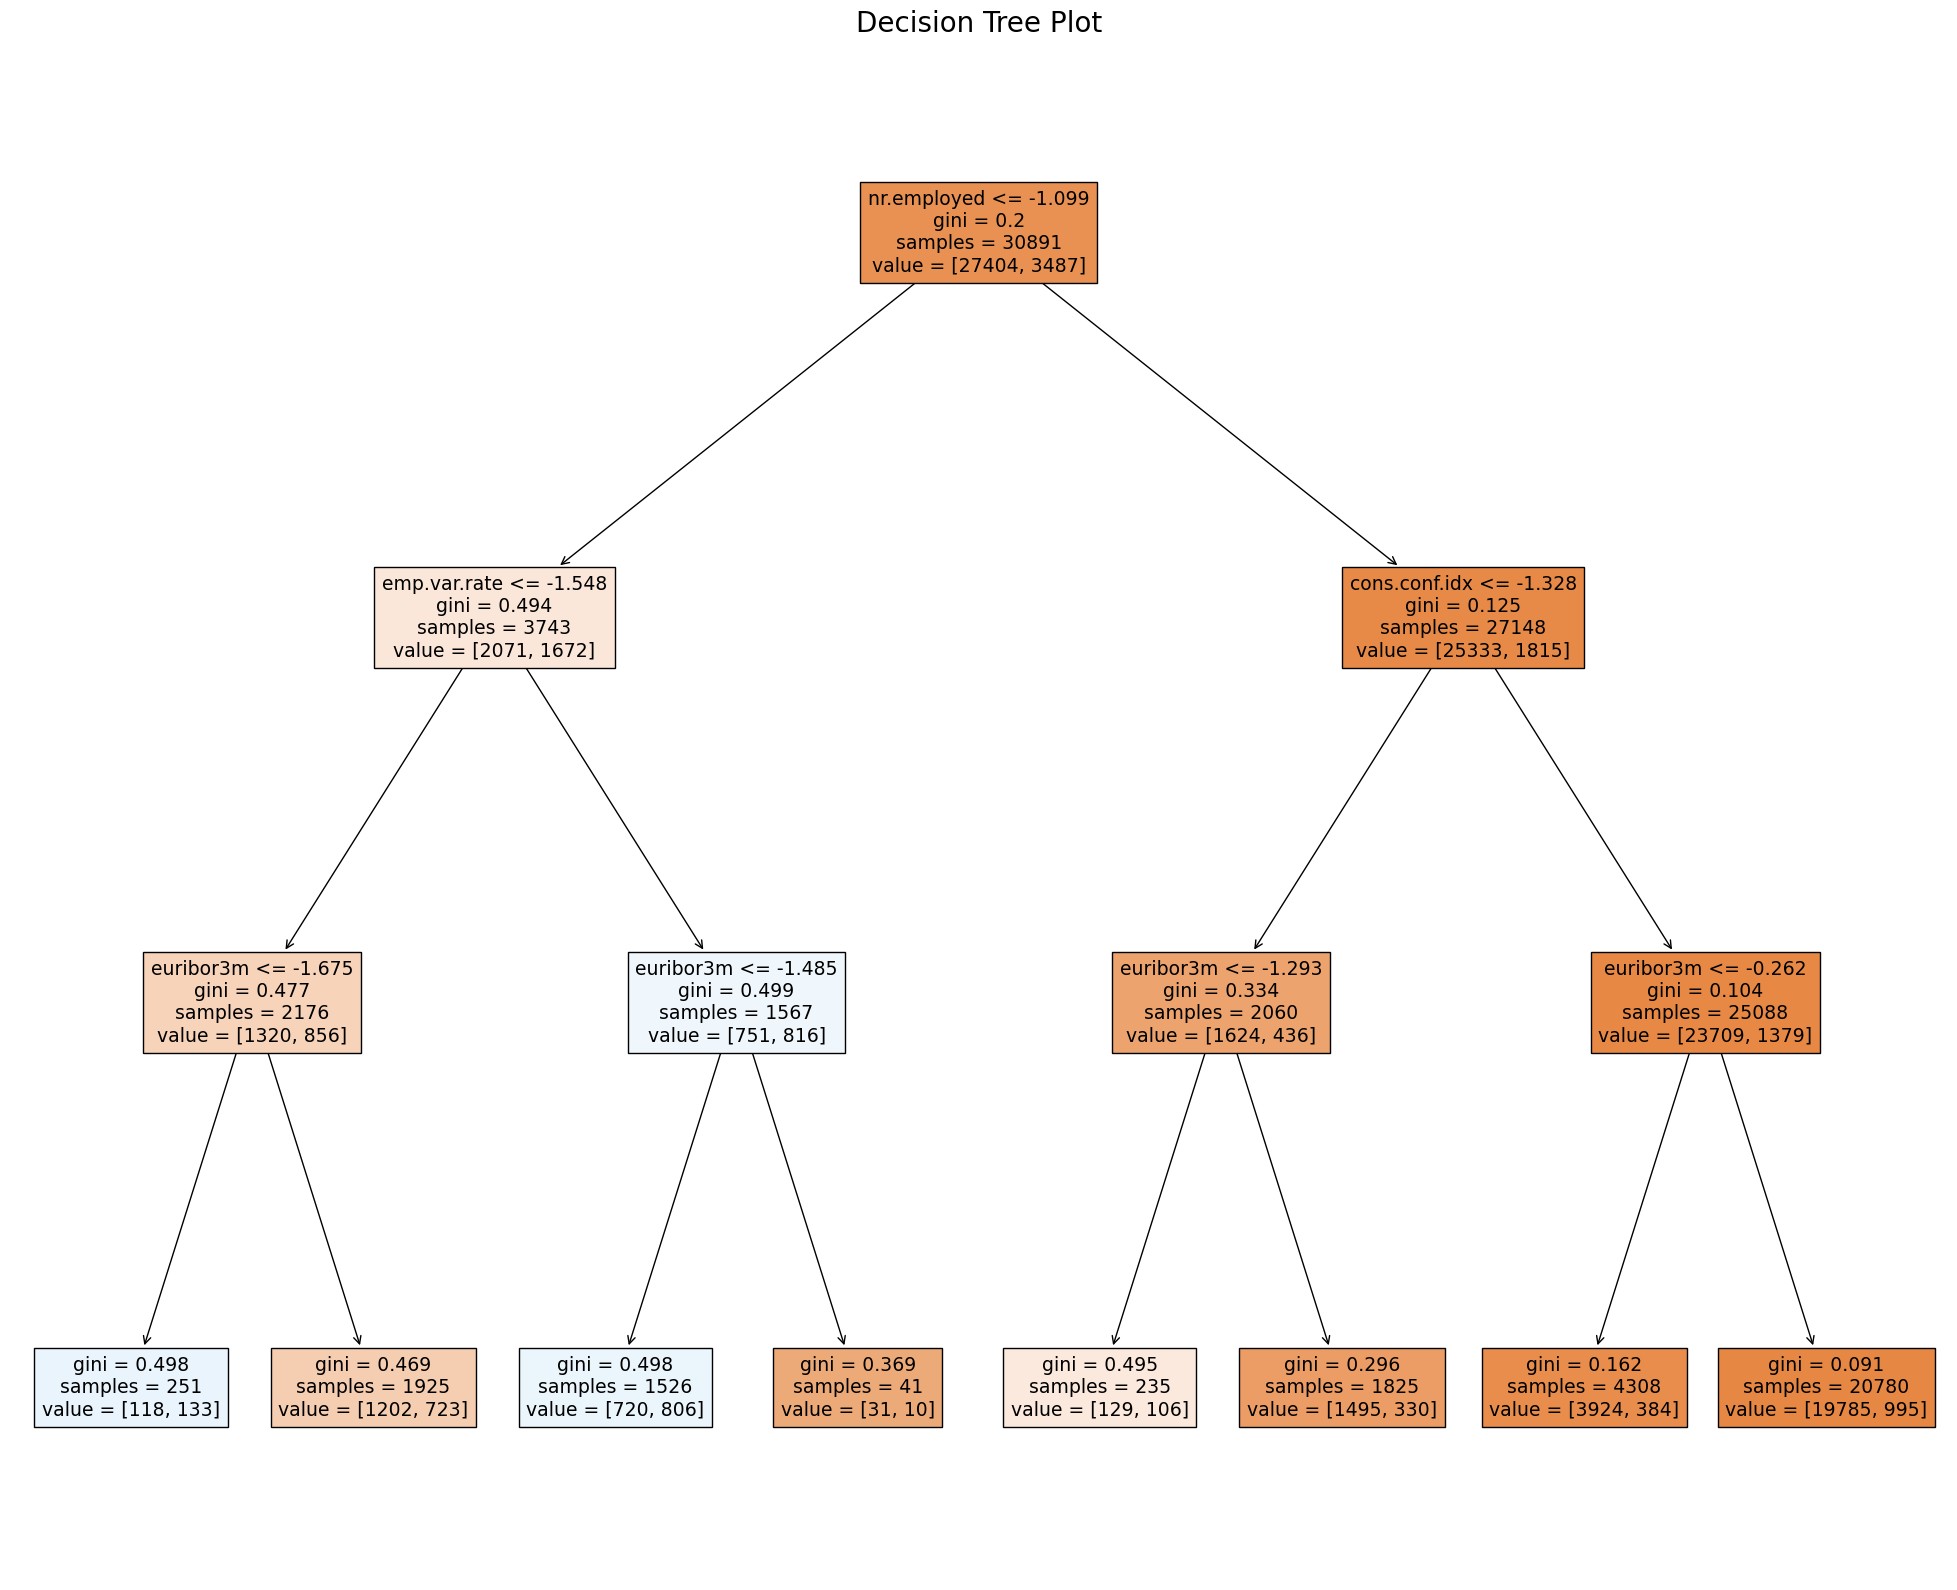

In [116]:
from sklearn import tree

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(decision_tree_best_model, 
                    feature_names=list(X.columns),  
                    filled=True)

plt.title("Decision Tree Plot", fontsize=20)